<a href="https://colab.research.google.com/github/quruis/2460_Presentation/blob/main/CodingAppSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, words
import nltk
nltk.download('words')
import re

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [12]:
# Download NLTK stopwords (execute this line once to download the stopwords)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Load CSV file into a DataFrame
# https://data.world/crowdflower/sentiment-of-climate-change/activity
url = 'https://github.com/quruis/2460_Presentation/raw/main/Tweets_CC.csv'
df = pd.read_csv(url, error_bad_lines=False)

df = df.drop_duplicates()


<ipython-input-13-435255da38cb>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, error_bad_lines=False)


In [14]:
# Assuming your CSV has a column named 'tweet' containing the textual data
text_data = ' '.join(df['tweet'].astype(str).values)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = ' '.join(word for word in text_data.split() if word.lower() not in stop_words)


In [15]:
# List of terms to exclude
exclude_terms = ['TIME', 'oohja', 'say', 'change climate', 'ow', 's climate', 's', 'new', 'ly', 'bit', 'bit ly', 'U S', 'tcot', 'ow ly', 'retwt', 'science', 'u', 'u s ', 'New', 'link', 'RT', 'Change link', 'tinyurl', 'via']

# Remove excluded terms from the text data
for term in exclude_terms:
    filtered_text = filtered_text.replace(term, '')

In [16]:
# Get a list of English words
english_words = set(words.words())

# Function to filter nonsense words
def filter_nonsense(text):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word in english_words]
    return ' '.join(filtered_words)

# Filter nonsense words from the text data
filtered_text = filter_nonsense(filtered_text)

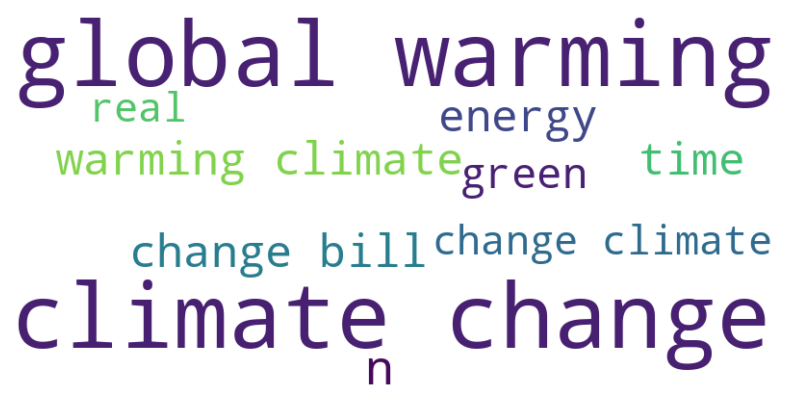

In [18]:
# Create WordCloud object without using frequencies
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    contour_width=1,
    contour_color='black',
    max_words=10,
    random_state=42
).generate(filtered_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
def train_sentiment_model(train_data):
    # Create a TextBlob object for each sentence in the training data
    train_data['Predicted_Sentiment'] = train_data['tweet'].apply(lambda x: analyze_sentiment_textblob(x))

    # Print classification report
    print("Classification Report:")
    print(classification_report(train_data['sentiment'], train_data['Predicted_Sentiment']))

def analyze_sentiment_textblob(sentence):
    # Create a TextBlob object for the given sentence
    blob = TextBlob(sentence)

    # Get the sentiment polarity
    sentiment_polarity = blob.sentiment.polarity

    # Classify sentiment based on polarity
    if sentiment_polarity > 0:
        return "Positive"
    elif sentiment_polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [27]:
# Read training data from a CSV file with labels
train_csv_file_path = "https://raw.githubusercontent.com/quruis/2460_Presentation/main/Train_Tweets_CC.csv"  # Replace with the path to your training data CSV file
train_data = pd.read_csv(train_csv_file_path)

# Read test data from a CSV file without labels
test_csv_file_path = "https://raw.githubusercontent.com/quruis/2460_Presentation/main/Tweets_CC.csv"  # Replace with the path to your test data CSV file
test_data = pd.read_csv(test_csv_file_path)

# Train the sentiment analysis model on the training set
train_sentiment_model(train_data)

# Initialize counters for the test set without labels
positive_count = 0
neutral_count = 0
negative_count = 0

# Analyze each sentence in the test set without labels using TextBlob and count sentiments
for index, row in test_data.iterrows():
    text = row['tweet']  # Replace 'Text' with the actual column name in your CSV file

    sentiment = analyze_sentiment_textblob(text)

    if sentiment == "Positive":
        positive_count += 1
    elif sentiment == "Negative":
        negative_count += 1
    else:
        neutral_count += 1

    # Print sentiment for each sentence in the test set without labels
    #print(f"Text: {text}\nSentiment: {sentiment}\n")


Classification Report:
              precision    recall  f1-score   support

    Negative       0.52      0.22      0.31       114
     Neutral       0.27      0.46      0.34        50
    Positive       0.21      0.39      0.27        36

    accuracy                           0.31       200
   macro avg       0.33      0.36      0.31       200
weighted avg       0.40      0.31      0.31       200



In [23]:
train_data.head()

,tweet,sentiment,Predicted_Sentiment
0,Global warming report urges governments to act...,Negative,Neutral
1,Fighting poverty and global warming in Africa ...,Neutral,Neutral
2,Carbon offsets: How a Vatican forest failed to...,Negative,Negative
3,Carbon offsets: How a Vatican forest failed to...,Negative,Negative
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Negative,Neutral


In [24]:
# Print sentiment counts for the test set without labels
print(f"Positive Count (Test Set without Labels): {positive_count}")
print(f"Neutral Count (Test Set without Labels): {neutral_count}")
print(f"Negative Count (Test Set without Labels): {negative_count}")

Positive Count (Test Set without Labels): 1970
Neutral Count (Test Set without Labels): 2857
Negative Count (Test Set without Labels): 1263


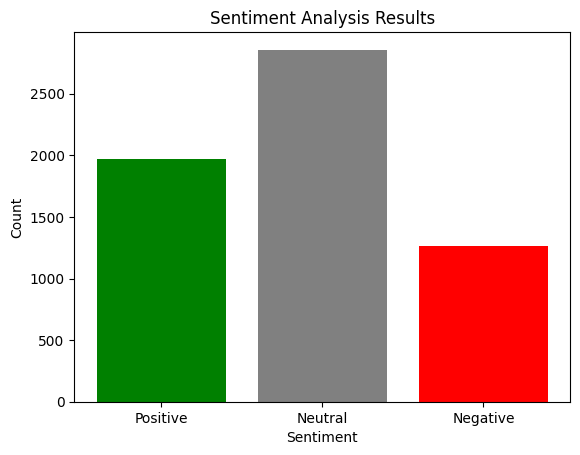

In [25]:
def generate_bar_chart(positive_count, neutral_count, negative_count):
    # Data
    categories = ['Positive', 'Neutral', 'Negative']
    counts = [positive_count, neutral_count, negative_count]

    # Create bar chart
    plt.bar(categories, counts, color=['green', 'gray', 'red'])

    # Adding labels and title
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Analysis Results')

    # Show the plot
    plt.show()

# Call the function with example values
generate_bar_chart(positive_count, neutral_count, negative_count)


In [ ]:
# Example classification report as a dictionary
classification_report = {
    'Negative': {'precision': 0.50, 'recall': 0.31, 'f1-score': 0.38},
    'Neutral': {'precision': 0.39, 'recall': 0.63, 'f1-score': 0.48},
    'Positive': {'precision': 0.45, 'recall': 0.37, 'f1-score': 0.41}

}

# Extract data from the dictionary
classes = list(classification_report.keys())
precision = [classification_report[class_name]['precision'] for class_name in classes]
recall = [classification_report[class_name]['recall'] for class_name in classes]
f1_score = [classification_report[class_name]['f1-score'] for class_name in classes]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Set bar width
bar_width = 0.2

# Set positions for bars on X-axis
index = range(len(classes))

# Plot bars for precision, recall, and F1-score
bar1 = ax.bar(index, precision, bar_width, label='Precision')
bar2 = ax.bar(index, recall, bar_width, label='Recall', bottom=precision)
bar3 = ax.bar(index, f1_score, bar_width, label='F1-Score', bottom=np.array(precision) + np.array(recall))

# Set labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(index)
ax.set_xticklabels(classes)
ax.legend()

# Show the plot
plt.show()


Precision: Precision measures the accuracy of positive predictions. In this case, for each class, it represents the proportion of correctly predicted instances among all instances predicted as that class. Higher precision values indicate better performance.

Recall: Recall measures the ability of the model to capture all positive instances. It is the proportion of correctly predicted instances of a class among all actual instances of that class. Higher recall values suggest better performance in capturing positive instances.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1-score is useful when there is an uneven class distribution. A higher F1-score indicates a better balance between precision and recall.

Support: The number of actual occurrences of each class in the dataset.

Accuracy: The overall correctness of predictions.

Interpretation:

Negative Class:

Precision: 0.50 (50%) - Fair precision, indicating that 50% of instances predicted as Negative were correct.
Recall: 0.31 (31%) - Moderate recall, suggesting that the model captured only 31% of actual Negative instances.
F1-Score: 0.38 - A balance between precision and recall for Negative class.
Neutral Class:

Precision: 0.39 (39%) - Decent precision, indicating that 39% of instances predicted as Neutral were correct.
Recall: 0.63 (63%) - Good recall, suggesting that the model captured 63% of actual Neutral instances.
F1-Score: 0.48 - A balance between precision and recall for Neutral class.
Positive Class:

Precision: 0.45 (45%) - Fair precision, indicating that 45% of instances predicted as Positive were correct.
Recall: 0.37 (37%) - Moderate recall, suggesting that the model captured only 37% of actual Positive instances.
F1-Score: 0.41 - A balance between precision and recall for Positive class.
Overall:

Accuracy: 0.43 (43%) - The overall correctness of predictions across all classes.